In [2]:
%pip install tensorflow
import tensorflow as tf
# Import the numpy package (math, arrays, etc.)
import numpy as np
# Matplotlib for graphing
import matplotlib.pyplot as plt
# Math functions
import math


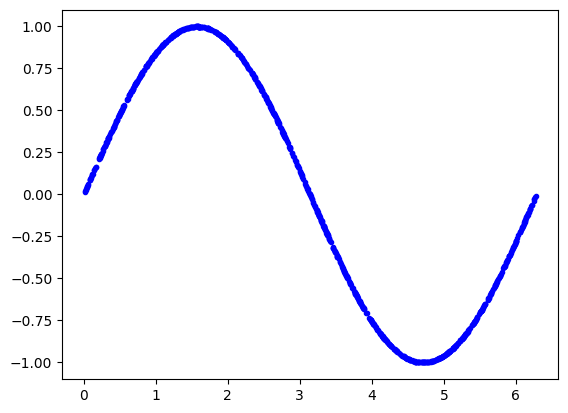

In [3]:
# Generate Sine Wave
SAMPLES = 1000

# Set a "seed" for the random number generator each time the code is run
SEED = 717
# Set the random seed for numpy and tensorflow
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Generate random values for x in a complete cycle of a sine wave
x_values = np.random.uniform(low=0, high=2*np.pi, size=SAMPLES)

# Shuffle the values to guarantee they are in random order
np.random.shuffle(x_values)

# Calculate the corresponding sine values
y_values = np.sin(x_values)

# Plot data
plt.plot(x_values, y_values, 'b.')
plt.show()

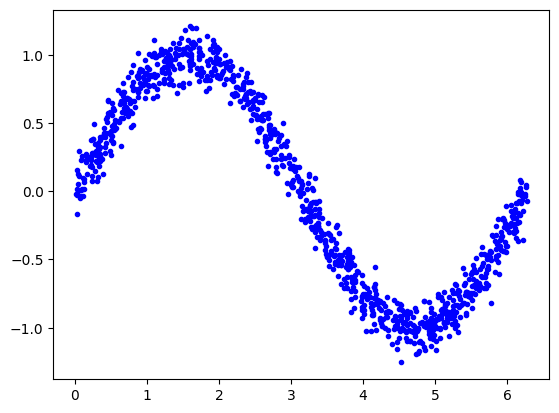

In [4]:
# Add some noise to the data for each y value
y_values += 0.1 * np.random.randn(*y_values.shape)

# Plot data
plt.plot(x_values, y_values, 'b.')
plt.show()

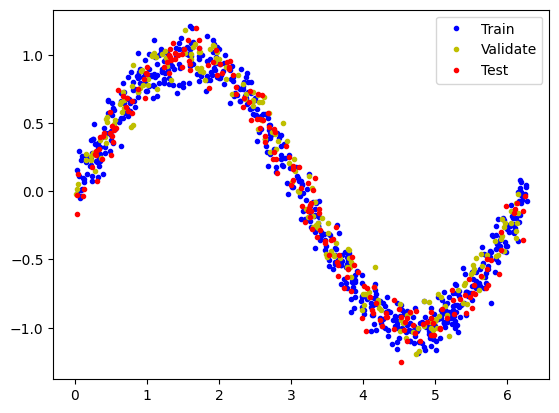

In [5]:
# 60% of the data will be used for training and 20% for testing and 20% for validation
TRAIN_SPLIT = int(0.6 * SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)

# Split the data into training, validation, and test sets
x_train, x_validate, x_test = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_validate, y_test = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])

# Verify the size of the partitions
assert (x_train.size + x_validate.size + x_test.size) == SAMPLES

# Plot the data in each partition in different colors:
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.legend()
plt.show()


In [8]:
# Use Keras to build a neural network
from tensorflow.keras import layers
model_1 = tf.keras.Sequential()

# Add the first dense layer with 16 units and ReLU activation that receives a single value as input and pass it on 16 neurons to try to find the non-linear relationship in the data
model_1.add(layers.Dense(16, activation='relu', input_shape=(1,)))

# Final layer is a single neuron, since the output is a single value
model_1.add(layers.Dense(1))

# Compile the model
model_1.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Print summary of the model architecture
model_1.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49 (196.00 B)

 Trainable params: 49 (196.00 B)

 Non-trainable params: 0 (0.00 B)